 ##                               PROJECT NAME:PETROL PRICE FORECASTING

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### 1)In this project we will try to forecast the different petrol prices for the upcoming month

### 2)we will done this using the stack LSTM model

### Import Libraries 

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

### Data collection and Data Analysis

In [39]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [40]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [41]:
df2 = df1.dropna()

In [42]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

C:\Users\Bisma Bashir\AppData\Local\Temp\ipykernel_7764\2446066184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


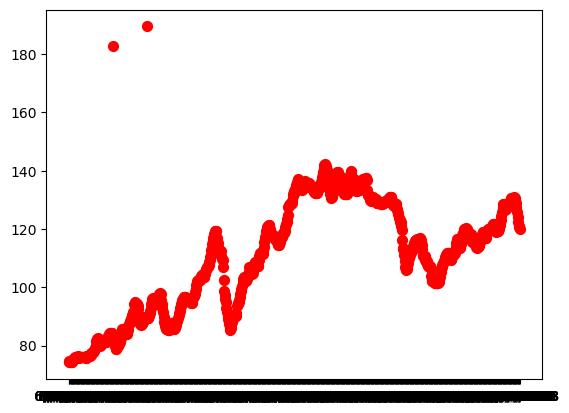

In [43]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


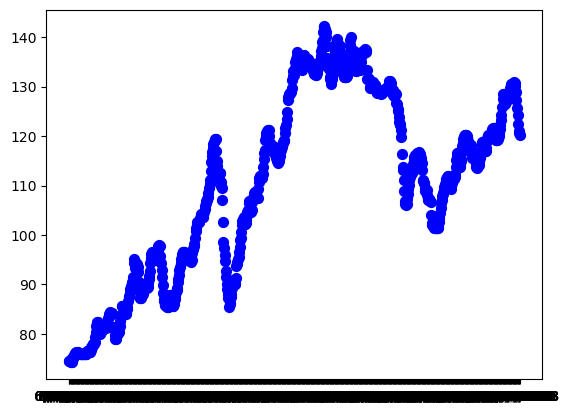

In [44]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)
df3.head()

In [45]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [46]:
## perform scaling to bring the features between the scale 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [47]:
df4.shape

(809, 1)

In [48]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [49]:
## splitting the train test data using the sequential splitting method
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [50]:
training_size , test_size

(525, 284)

### Data Preprocessing

In [53]:
 import numpy
# preparing dependent and independent features
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99     100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [54]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
print (X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

In [56]:
print(X_test.shape) , print(ytest.shape)

(183, 100)
(183,)


(None, None)

In [57]:
## reshape input to be [samples, timesteps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
X_train.shape

(424, 100, 1)

### BUILDING THE LSTM MODEL

In [62]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 8s 323ms/step - loss: 0.1826 - val_loss: 0.0703
Epoch 2/100
7/7 [==============================] - 1s 144ms/step - loss: 0.0364 - val_loss: 0.0210
Epoch 3/100
7/7 [==============================] - 1s 188ms/step - loss: 0.0251 - val_loss: 0.0042
Epoch 4/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0150 - val_loss: 0.0081
Epoch 5/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0108 - val_loss: 0.0059
Epoch 6/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0091 - val_loss: 0.0062
Epoch 7/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 8/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 9/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 10/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 11/

7/7 [==============================] - 1s 155ms/step - loss: 0.0010 - val_loss: 8.0237e-04
Epoch 83/100
7/7 [==============================] - 1s 169ms/step - loss: 0.0011 - val_loss: 9.6438e-04
Epoch 84/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 85/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0013 - val_loss: 7.8003e-04
Epoch 86/100
7/7 [==============================] - 1s 134ms/step - loss: 9.6387e-04 - val_loss: 7.5382e-04
Epoch 87/100
7/7 [==============================] - 1s 132ms/step - loss: 9.3516e-04 - val_loss: 7.7944e-04
Epoch 88/100
7/7 [==============================] - 1s 154ms/step - loss: 9.6845e-04 - val_loss: 9.8817e-04
Epoch 89/100
7/7 [==============================] - 1s 135ms/step - loss: 9.7213e-04 - val_loss: 7.5112e-04
Epoch 90/100
7/7 [==============================] - 1s 152ms/step - loss: 9.4825e-04 - val_loss: 7.3481e-04
Epoch 91/100
7/7 [==============================] - 1s 143ms/

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 36ms/step


In [65]:
## Transformback to original scale
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
##calculating the RMSE metrics for training and test data
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

112.38921182910755
116.3349652169564


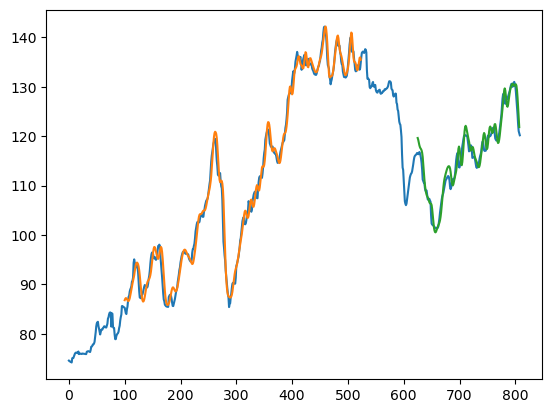

In [99]:
### Plotting to check the training data prediction and test prediction
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [100]:
model.save("petrol price prediction")

INFO:tensorflow:Assets written to: petrol price prediction\assets


INFO:tensorflow:Assets written to: petrol price prediction\assets


In [101]:
len(test_data)

284

In [102]:
x_input=test_data[184:].reshape(1,-1)

In [103]:
x_input.shape

(1, 100)

In [104]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [105]:
temp_input

[0.6764273101824605,
 0.6759858740435554,
 0.6767216009417307,
 0.67554443790465,
 0.6740729841082991,
 0.6708357857563274,
 0.6583284284873456,
 0.6447910535609185,
 0.6286050618010597,
 0.6299293702177753,
 0.6375809299587996,
 0.6465567981165394,
 0.6455267804590936,
 0.6305179517363158,
 0.6090347263095939,
 0.6100647439670397,
 0.6118304885226606,
 0.6122719246615658,
 0.6103590347263097,
 0.6019717480871103,
 0.5918187168922899,
 0.5816656856974691,
 0.5793113596233079,
 0.5838728663919954,
 0.5853443201883461,
 0.5878457916421425,
 0.5969688051795174,
 0.6080047086521485,
 0.6155091230135377,
 0.6208063566804005,
 0.6288993525603299,
 0.6464096527369043,
 0.6568569746909947,
 0.6571512654502651,
 0.646262507357269,
 0.6319894055326665,
 0.6297822248381404,
 0.6302236609770455,
 0.6305179517363158,
 0.6380223660977047,
 0.6577398469688054,
 0.6689228958210713,
 0.6756915832842849,
 0.670100058858152,
 0.6724543849323132,
 0.6734844025897588,
 0.6737786933490291,
 0.67657445556209

## Perform predictions for the next 30 days

In [106]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])  ## shiffting 1 position to the write
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output) ## adding all the output inside this list 

[0.6586172]
101
1 day input [0.67598587 0.6767216  0.67554444 0.67407298 0.67083579 0.65832843
 0.64479105 0.62860506 0.62992937 0.63758093 0.6465568  0.64552678
 0.63051795 0.60903473 0.61006474 0.61183049 0.61227192 0.61035903
 0.60197175 0.59181872 0.58166569 0.57931136 0.58387287 0.58534432
 0.58784579 0.59696881 0.60800471 0.61550912 0.62080636 0.62889935
 0.64640965 0.65685697 0.65715127 0.64626251 0.63198941 0.62978222
 0.63022366 0.63051795 0.63802237 0.65773985 0.6689229  0.67569158
 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446 0.68143025
 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766 0.68143025
 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485  0.66539141
 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523 0.7373455
 0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0

9 day output [[0.5814106]]
10 day input [0.63758093 0.6465568  0.64552678 0.63051795 0.60903473 0.61006474
 0.61183049 0.61227192 0.61035903 0.60197175 0.59181872 0.58166569
 0.57931136 0.58387287 0.58534432 0.58784579 0.59696881 0.60800471
 0.61550912 0.62080636 0.62889935 0.64640965 0.65685697 0.65715127
 0.64626251 0.63198941 0.62978222 0.63022366 0.63051795 0.63802237
 0.65773985 0.6689229  0.67569158 0.67010006 0.67245438 0.6734844
 0.67377869 0.67657446 0.68143025 0.68790465 0.6958505  0.69864626
 0.69923484 0.69702766 0.68143025 0.66715715 0.66333137 0.66068275
 0.66156563 0.6624485  0.66539141 0.67319011 0.68201883 0.69496763
 0.70644497 0.72189523 0.7373455  0.7610359  0.78531489 0.79782225
 0.80047087 0.79031783 0.77942908 0.77001177 0.77633902 0.78369629
 0.78413773 0.78472631 0.79178929 0.79723367 0.80311948 0.80885815
 0.81739258 0.82445556 0.82960565 0.82960565 0.82062978 0.82313125
 0.83284285 0.83534432 0.83034138 0.82254267 0.80532666 0.78266627
 0.75868158 0.73705121 

18 day output [[0.5231399]]
19 day input [0.60197175 0.59181872 0.58166569 0.57931136 0.58387287 0.58534432
 0.58784579 0.59696881 0.60800471 0.61550912 0.62080636 0.62889935
 0.64640965 0.65685697 0.65715127 0.64626251 0.63198941 0.62978222
 0.63022366 0.63051795 0.63802237 0.65773985 0.6689229  0.67569158
 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446 0.68143025
 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766 0.68143025
 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485  0.66539141
 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523 0.7373455
 0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0.83284285 0.83534432 0.83034138
 0.82254267 0.80532666 0.78266627 0.75868158 0.73705121 0.70865215
 0.68878752 0.68275456 0.67642731 0.6586172  0.64580768 0.6358723
 0.62745875 0.61971843 

28 day output [[0.5291689]]
29 day input [0.62080636 0.62889935 0.64640965 0.65685697 0.65715127 0.64626251
 0.63198941 0.62978222 0.63022366 0.63051795 0.63802237 0.65773985
 0.6689229  0.67569158 0.67010006 0.67245438 0.6734844  0.67377869
 0.67657446 0.68143025 0.68790465 0.6958505  0.69864626 0.69923484
 0.69702766 0.68143025 0.66715715 0.66333137 0.66068275 0.66156563
 0.6624485  0.66539141 0.67319011 0.68201883 0.69496763 0.70644497
 0.72189523 0.7373455  0.7610359  0.78531489 0.79782225 0.80047087
 0.79031783 0.77942908 0.77001177 0.77633902 0.78369629 0.78413773
 0.78472631 0.79178929 0.79723367 0.80311948 0.80885815 0.81739258
 0.82445556 0.82960565 0.82960565 0.82062978 0.82313125 0.83284285
 0.83534432 0.83034138 0.82254267 0.80532666 0.78266627 0.75868158
 0.73705121 0.70865215 0.68878752 0.68275456 0.67642731 0.6586172
 0.64580768 0.6358723  0.62745875 0.61971843 0.6121878  0.60464376
 0.59699881 0.58924276 0.58141059 0.57356977 0.56581074 0.55824101
 0.55097717 0.54413831

In [107]:
new_day=np.arange(1,101) ## storing the previous 100 days data
pred_day=np.arange(101,131) ## getting the next 30days data 

In [108]:
len(df4)

809

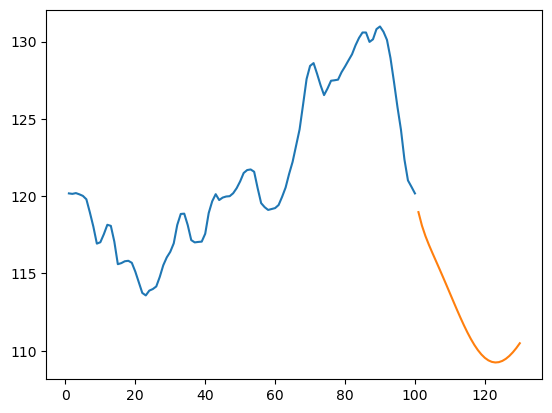

In [109]:
## plotting to check the predictions made for the next 30 days along with the previous 100 days
plt.plot(new_day,scaler.inverse_transform(df4[709:])) ## displays the previous 100days data
plt.plot(pred_day,scaler.inverse_transform(lst_output)) ## displays the predicted 30days output data

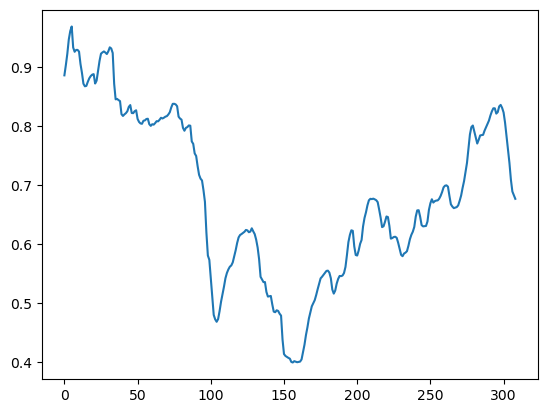

In [112]:
data=df4.tolist()
data.extend(lst_output)
plt.plot(df4[500:])